# TP Transcriptomique 1 - TP5 - 2020-2021


## Analyse de données de puces (MicroArrays)

### Adaptation du TP MeV Testis Vs Ovary, sous forme de Jupyter Notebook en R

Selon les explications du site https://wiki.bits.vib.be/index.php/Analyze_your_own_microarray_data_in_R/Bioconductor

---
**Avant toute chose**

<mark>Avant de démarrer cette analyse, sauvegardez une copie de ce notebook pour backup. <mark>

Vous pouvez aussi faire des copies de ce notebook au fur et à mesure de la progression

---

__*Rappels sur l'utilisation des notebooks*__

- Pour ajouter une nouvelle cellule, cliquez sur l'icône "+" dans la barre des menus *
- Vous pouvez "cliquer-glisser" pour bouger une cellule *
- Vous pouvez choisir le type de cellule dans le petit menu déroulant dans la barre des menus : *
    - 'Code' pour entrer des lignes de commandes à executer *
    - 'Markdown cells' pour ajouter simplement du texte, formatable avec quelques signes *
- Pour executer une cellule 'Code', pressez SHIFT+ENTER ou cliquez sur l'icône "play" *
- Pour afficher une cellule 'Markdown', pressez SHIFT+ENTER ou cliquez sur l'icône "play" *
- Pour modifier une cellule 'Markdown', double-cliquez dessus*

---

## I - Préparation de l'espace de travail

Ceci est un jupyter notebook en R, ce qui signifie que les commandes seront des commandes R directement interprétables par Plasma. 
Comme pour tout projet en R, nous devons d'abord choisir le répertoire de travail. Par défaut, ce sera celui de l'environnement déployé lors de l'ouverture du TP.
Puis nous devons indiquer à R les paquets à charger qui seront nécessaires pour l'analyse. 


In [1]:
# Le répertoire de travail est d'office attribué au répertoire de l'environnement par Jupyter Hub
# setwd("~/m1meg-ue1-tp5-r/")

In [2]:
# Chargement des packages dans l'environnement présent
library(Matrix)
library(lattice)
library(fdrtool)
library(rpart)
library(Biobase)
library(Biostrings)
library(mouse4302cdf)
library(ggplot2)
library(limma)
library(affy)
library(affyPLM)
library(simpleaffy)
library(genefilter)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes co

Nous pouvons vérifier ces éléments avec les commandes suivantes : 

In [3]:
getwd()
sessionInfo()

[1] "/srv/home/scaburet/m1meg-ue1-tp5-r"

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] simpleaffy_2.62.0     genefilter_1.68.0     affyPLM_1.62.0       
 [4] preprocessCore_1.48.0 gcrma_2.58.0          affy_1.64.0          
 [7] limma_3.42.2          ggplot2_3.3.2         mouse4302cdf_2.18.0  
[10] Biostrings_2.54.0     XVector_0.26.0        IRanges_2.20.2       
[13] S4V

## II - Analyse des puces 

Nous allons analyser un ensemble de données d’expression, obtenues sur puces d’expression de type Affymetrix. Il s’agit d’une portion de la série **GSE12989**, accessible par une des deux bases de données d’expression génique (“repository”) : Gene Expression Omnibus (GEO) http://www.ncbi.nlm.nih.gov/geo/
Sur GEO, un ensemble d'échantillons composent une **Série**, avec un identifiant commençant par GSE.

Ouvrez le lien https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE12989

La description de la série indique :

Status 			Public on Jun 24, 2009
Title 			Foxl2 functions throughout mouse ovary development
Organism 		Mus musculus
Experiment type 	Expression profiling by array
Summary 		This SuperSeries is composed of the following subset Series:
- GSE12905: Foxl2 functions in sex determination and histogenesis throughout mouse ovary development, analyzed by Affymetrix arrays
- GSE12942: Foxl2 functions in sex determination and histogenesis throughout mouse ovary development, analyzed by Agilent arrays
Citation(s) 
•	Garcia-Ortiz JE, Pelosi E, Omari S, Nedorezov T et al. Foxl2 functions in sex determination and histogenesis throughout mouse ovary development. BMC Dev Biol 2009 Jun 18;9:36. PMID: 19538736

Les puces Affymetrix utilisées dans le subset GSE12905 suivent la plateforme (design de la puce) GPL1261, c’est à dire le Affymetrix Mouse Genome 430 2.0 Array (nom commercial de la puce).


> <mark>**Question 1 :**<mark>  
> Combien d’échantillons analysés avec cette puce sont présents dans GEO ? 

*Double-cliquez ici pour entrer votre réponse ou des notes*  
56619

### 1 - Récupération des données

Les fichiers CEL qui nous intéressent ont déjà été télécharchés sur Plasmabio. Il suffit donc d'indiquer à R où aller les chercher, et stocker cette information dans la variable *celpath*


In [4]:
# Chemin d'accès aux données sur plasmabio :
celpath = "/srv/data/meg-m1-ue1/DataTP5/"

Nous allons maintenant charger les données de ces fichiers dans un objet R approprié : AffyBatch

In [5]:
# Import des données d'intensité de fluorescence brutes des sondes depuis les fichiers CEL, 
# et ajout dans un objet R AffyBatch
data = ReadAffy(celfile.path=celpath)

Cet objet AffyBatch est accessible via des méthodes contenues dans le package affy.

In [6]:
# Récupération de l'annotation des échantillons
ph = data@phenoData
ph
ph@data

An object of class 'AnnotatedDataFrame'
  sampleNames: GSM323828-testis_E13_1.CEL.gz
    GSM323829-testis_E13_2.CEL.gz ... GSM323851-ovary_P0_3.CEL.gz (12
    total)
  varLabels: sample
  varMetadata: labelDescription

,sample
GSM323828-testis_E13_1.CEL.gz,1
GSM323829-testis_E13_2.CEL.gz,2
GSM323830-testis_E13_3.CEL.gz,3
GSM323831-testis_P0_1.CEL.gz,4
GSM323832-testis_P0_2.CEL.gz,5
GSM323833-testis_P0_3.CEL.gz,6
GSM323834-ovary_E13_1.CEL.gz,7
GSM323835-ovary_E13_2.CEL.gz,8
GSM323836-ovary_E13_3.CEL.gz,9
GSM323849-ovary_P0_1.CEL.gz,10


> <mark>**Question 2 :**<mark>  
> Combien d’échantillons de testicules et d’ovaires sont présents ? 
Combien y a t-il de réplicats par stade de développement ? 

Remplir votre réponse

*Double-cliquez ici pour entrer votre réponse ou des notes. Par la suite, il vous suffira de sélectionner la cellule de la question, puis d'ajouter une cellule markdown avec le "+" pour entrez vos réponses*   


In [7]:
#Récupération de l'annotation des sondes
feat = data@featureData
feat
feat@data

An object of class 'AnnotatedDataFrame': none

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1      
2      
3      
4      
5      
6      
7      
8      
9      
10     
11     
12     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     
26     
27     
28     
29     
30     
...    
1003975
1003976
1003977
1003978
1003979
1003980
1003981
1003982
1003983
1003984
1003985
1003986
1003987
1003988
1003989
1003990
1003991
1003992
1003993
1003994
1003995
1003996
1003997
1003998
1003999
1004000
1004001
1004002
1004003
1004004

In [8]:
# Récupération du nom du fichier CDF associé aux puces
cdfName(data)

[1] "Mouse430_2"

In [9]:
# Récupération du nombre de probe sets représentés sur les puces
# (La fonction length() compte le nombre d'items dans un vecteur)
length(featureNames(data))

[1] 45101

> <mark>**Question 3 :**<mark>  
> Combien de probes sets sont analysés grâce à cette puce ? 


### 2 - Contrôle qualité des données de puces

Nous commençons par attribuerdes noms un peu plus gérables aux échantillons :


In [10]:
# Attribution de noms informatifs aux échantillons
ph@data[ ,1] = c("Testis_E13_1","Testis_E13_2","Testis_E13_3","Testis_P0_1","Testis_P0_2","Testis_P0_3","Ovary_E13_1","Ovary_E13_2","Ovary_E13_3", "Ovary_P0_1", "Ovary_P0_2", "Ovary_P0_3")
ph@data

,sample
GSM323828-testis_E13_1.CEL.gz,Testis_E13_1
GSM323829-testis_E13_2.CEL.gz,Testis_E13_2
GSM323830-testis_E13_3.CEL.gz,Testis_E13_3
GSM323831-testis_P0_1.CEL.gz,Testis_P0_1
GSM323832-testis_P0_2.CEL.gz,Testis_P0_2
GSM323833-testis_P0_3.CEL.gz,Testis_P0_3
GSM323834-ovary_E13_1.CEL.gz,Ovary_E13_1
GSM323835-ovary_E13_2.CEL.gz,Ovary_E13_2
GSM323836-ovary_E13_3.CEL.gz,Ovary_E13_3
GSM323849-ovary_P0_1.CEL.gz,Ovary_P0_1


#### Histogrammes de distribution des données 
Puis nous créons 2 histogrammes de la distribution des données (avec ggplot2).
Le premier affiche la répartition des données brutes, le second celle des valeurs passées en log2.

In [11]:
# Récupérations des intensités PM (sondes Perfect Match dans les probe sets)
pmexp = pm(data)

# La méthode dim() fournit le nombre d'éléments dans la matrice, 
# c'est à dire le nomdre de sondes (lignes) et le nombre d'échantillons (colonnes)
dim(pmexp)

[1] 496468     12

On crée des vecteurs qui vont nous servir comme colonnes de la dataframe pour les histogrammes
  - un pour y mettre les noms des échantillons, appelé **sampleNames**
  - un pour y stocker les intensités de fluorescences brutes, applelé **nologs**
  - un pour y stocker les intensités passées en log2, appelé **logs**

In [12]:
# initialisation de 3 vecteurs
sampleNames = vector()
nologs = vector()
logs = vector()

# remplissage des vecteurs avec les données
for (i in 1:12)
{
  sampleNames = c(sampleNames,rep(ph@data[i,1],dim(pmexp)[1]))
  nologs = c(nologs, pmexp[,i])
  logs = c(logs,log2(pmexp[,i]))
}

# Vérification avec les premières valeurs
nologs[1:10]
logs[1:10]

754776 558601 604987 901278 376404 476021 550268 229744 199674 927232 
  1722   3529   2255    945   2280   2695   3204   2306   1618   2145

754776    558601    604987    901278    376404    476021    550268    229744 
10.749869 11.785044 11.138912  9.884171 11.154818 11.396070 11.645658 11.171177 
   199674    927232 
10.659996 11.066762

In [13]:
# Après avoir rempli les vecteurs, nous combinons sampleNames et nologs ou logs dans 2 dataframes
nologData = data.frame(nologInt=nologs,sampleName=sampleNames)
logData = data.frame(logInt=logs,sampleName=sampleNames)

# Vérification avec les premières valeurs
nologData[1:5,]
logData[1:5,]

dim(nologData)
dim(logData)


nologInt,sampleName
1722,Testis_E13_1
3529,Testis_E13_1
2255,Testis_E13_1
945,Testis_E13_1
2280,Testis_E13_1


logInt,sampleName
10.749869,Testis_E13_1
11.785044,Testis_E13_1
11.138912,Testis_E13_1
9.884171,Testis_E13_1
11.154818,Testis_E13_1


[1] 5957616       2

[1] 5957616       2

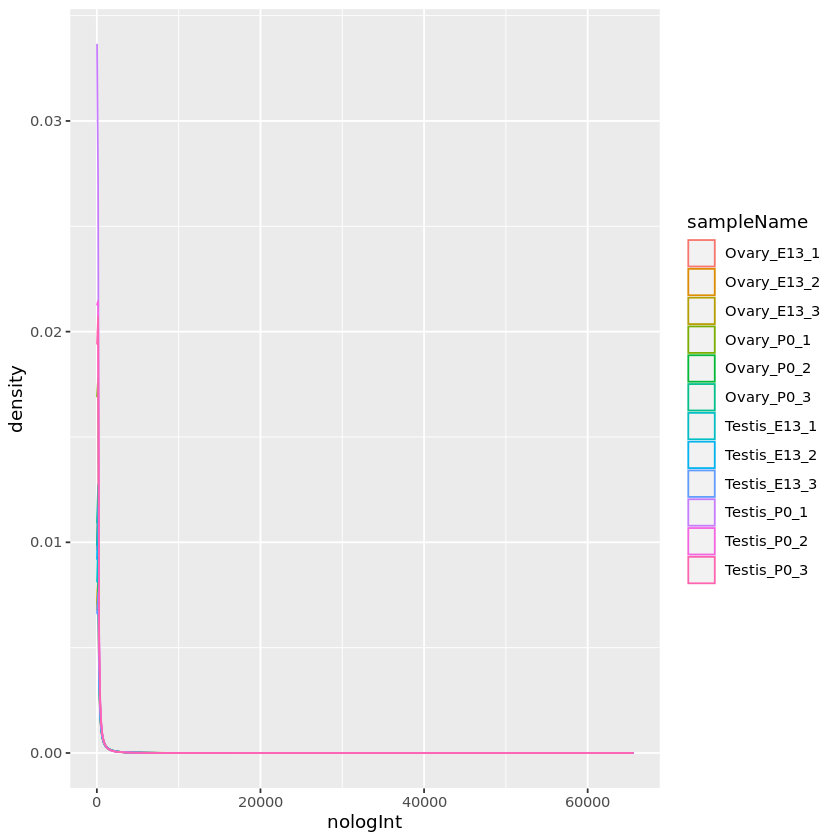

In [14]:
# Maintenant nous pouvons créer les 2 histogrammes: 
dataHist1 = ggplot(nologData, aes(nologInt, colour = sampleName)) 
dataHist1 + geom_density()

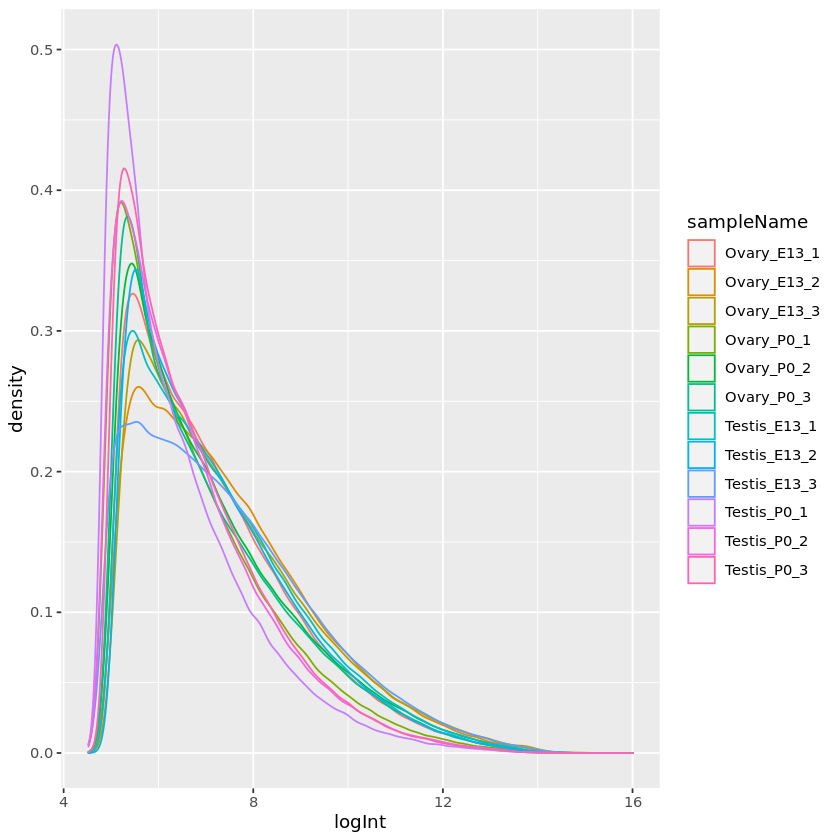

In [15]:
# Histogramme avec les valeurs en log2
dataHist2 = ggplot(logData, aes(logInt, colour = sampleName)) 
dataHist2 + geom_density()

> <mark>**Question 4 :**<mark>  
> Que pouvez-vous dire de la distribution des données ? Vous semble t-elle logique pour des transcriptomes ?

#### Boxplots de distribution des données 
Nous utilisons les mêmes dataframes pour créer 2 boxplots, 
de façon à comparer la répartition des données entre échantillons


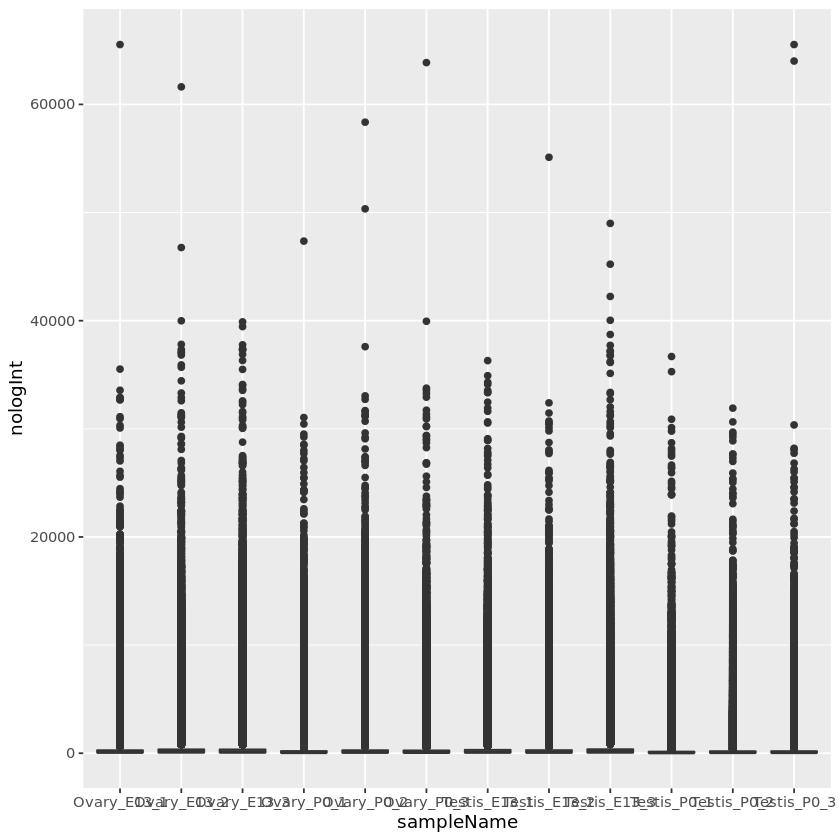

In [16]:
dataBox1 = ggplot(nologData,aes(sampleName,nologInt))
dataBox1 + geom_boxplot()

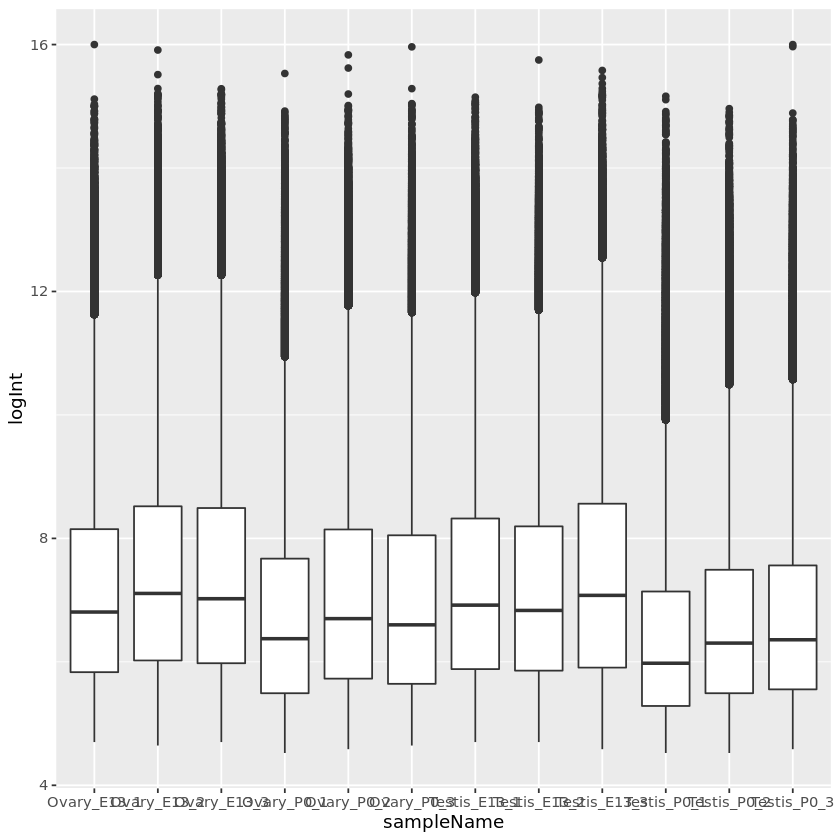

In [17]:
dataBox2 = ggplot(logData,aes(sampleName,logInt))
dataBox2 + geom_boxplot()

> <mark>**Question 5 :**<mark>  
> Pouvez-vous déterminer si les données ont été normalisées entre puces ou pas ? 

#### MA plots
Les plots MA permettent de visualiser la variablité de l'expression des gènes, et sa répartition en fonction du niveau d'expression.
Ici, chaque puce est compré à une pseudo-puce, pour laquelle chaque sonde est associée à la valeur médiane de son intensité dans tous les échantillons.

Dans un plot MA, M est figuré en fonction de A :

    - M est la différence d'intensité d'une sonde sur la puce testée et l'intensité de cette même sonde sur la pseudo-puce
    M = logPMInt_array - logPMInt_pseudoarray
    - A est la moyenne des intensités de cette sonde sur la puce testée et sur la pseudo-puce
    A = (logPMInt_array + logPMInt_pseudoarray)/2   
    
(les plots se créent dans des fichier séparés, colonne de gauche)

In [18]:
# Création des MA plots pour chaque échantillon.
for (i in 1:12)
{
  name = paste("MAplot",i,".jpg",sep="")
  jpeg(name)
  MAplot(data,which=i)
  dev.off()
}


Ouvrez les MA plots et examinez-les.

> <mark>**Question 6 :**<mark>  
> Que pouvez-vous constater ? Pensez-vous qu'il faille normaliser les donnéees ?

### 3 - Normalisation des données
Méthode GCRMA
The standard method for normalization is RMA. RMA is one of the few normalization methods that only uses the PM probes:
   - Background correction to correct for spatial variation within individual arrays: a background-corrected intensity is calculated for each PM probe in such a way that all background corrected intensities are positive
   - Log transformation to improve the distribution of the data: the base-2 logarithm of the background corrected intensity is calculated for each probe. 
     The log transformation will make the data less skewed and more normally distributed and provide an equal spread of up- and downregulated expression ratios
   - Quantile normalization to correct for variation between the arrays: equalizes the data distributions of the arrays and make the samples completely comparable
   - Probe normalization to correct for variation within probe sets: equalizes the behavior of the probes between the arrays and combines normalized data values of probes from a probe set into a single value for the whole probe set

GCRMA is based on RMA, having all the good sides of RMA. 
The difference lies in the background correction, all other steps are the same. 
GCRMA corrects for non-specific binding to the probes in contrast to RMA which completely ignores the issue of non-specific binding.
GCRMA uses probe sequence information (hence "GC")to estimate probe affinity to non-specific binding. 

*Normalement, nous utiliserions la méthode gcrma directement dans R, grâce à cette commande : 
library("gcrma")
data.gcrma = gcrma(data)*

*Pour des raisons techniques en cours de résolution, cela ne marche pas actuellement sur Plasma.*

*Nous allons donc charger directement le résultat de la normalisation pour la suite de l'analyse*


In [19]:
# Chargement de la library, nécessaire pour la suite
# library("gcrma")

# Chargement de l'objet "data_gcrma.RData", pour le réintégrer dans la procédure d'analyse
load("data_gcrma.RData")

Nous allons maintenant vérifier l'effet de la normalisation 

,GSM323828.testis_E13_1.CEL.gz,GSM323829.testis_E13_2.CEL.gz,GSM323830.testis_E13_3.CEL.gz,GSM323831.testis_P0_1.CEL.gz,GSM323832.testis_P0_2.CEL.gz,GSM323833.testis_P0_3.CEL.gz,GSM323834.ovary_E13_1.CEL.gz,GSM323835.ovary_E13_2.CEL.gz,GSM323836.ovary_E13_3.CEL.gz,GSM323849.ovary_P0_1.CEL.gz,GSM323850.ovary_P0_2.CEL.gz,GSM323851.ovary_P0_3.CEL.gz
1415670_at,11.596256,11.393299,11.525440,11.279200,11.429249,11.498585,11.564117,11.241949,11.272823,11.328090,11.288359,11.155460
1415671_at,9.531985,9.644883,9.375193,9.301797,9.371730,9.309830,9.279890,9.843269,9.764366,9.946210,10.296593,10.032472
1415672_at,10.955142,10.967570,10.848951,10.671957,10.588005,10.214207,10.989208,11.038672,10.876488,11.128077,11.584632,10.701681
1415673_at,6.416529,6.412119,6.669434,7.403711,6.740490,6.998737,6.507766,6.732253,6.834585,6.304858,6.391809,6.144550
1415674_a_at,7.057587,7.978188,7.093218,7.263679,6.478225,6.966761,7.752672,7.473594,8.527515,7.355395,7.253474,8.088277


[1] 11.596256  9.531985 10.955142  6.416529  7.057587  7.667030 10.350454
 [8]  8.642713 10.055331  9.603982

norm_logInt,sampleName
11.596256,Testis_E13_1
9.531985,Testis_E13_1
10.955142,Testis_E13_1
6.416529,Testis_E13_1
7.057587,Testis_E13_1


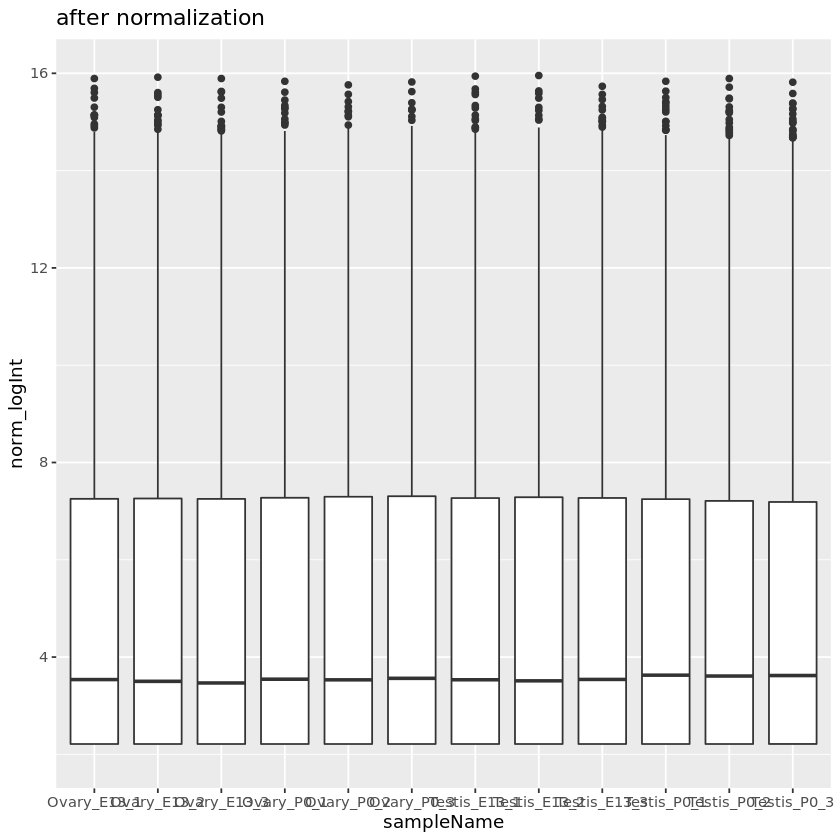

In [20]:
# Box plots des valeurs normalisées
# création d'une data frame avec seulement les valeurs d'expression normalisées
normexpr.gcrma = data.frame(exprs(data.gcrma))
normexpr.gcrma[1:5,]


# initialisation des vecteurs
sampleNames = vector()
normlogs = vector()

# remplissage des vecteurs
for (i in 1:12)
{
    sampleNames = c(sampleNames,rep(ph@data[i,1],dim(data.gcrma)[1]))
    normlogs = c(normlogs,normexpr.gcrma[,i])
}

normlogs[1:10]

# création de la dataframe avec les 2 vecteurs
normData = data.frame(norm_logInt=normlogs,sampleName=sampleNames)
normData[1:5,]

# création des graphs
dataBox3 = ggplot(normData, aes(sampleName,norm_logInt))
dataBox3 + geom_boxplot() + ylim(2,16) + ggtitle("after normalization")


> <mark>**Question 7 :**<mark>
Que pouvez-vous constater ? Pensez-vous que la normalisation entre échantillons a fonctionné ?

Pour voir ce que la normalisation a fait aux données de chaque échantillon, nous allons refaire les MA plots.

In [21]:
# MAplots des données normalisées 

for (i in 1:12)
{
  name = paste("MAplot-normData",i,".jpg",sep="")
  jpeg(name)
  MAplot(data.gcrma,which=i)
  dev.off()
}


> <mark>**Question 8 :**<mark>
Qu'en pensez-vous ?

### 4 - Groupement des échantillons : PCA

Pour voir si les échantillons se regroupent de façon cohérente, nous allons tenter une analyse PCA (Principal omponant Analysis).  
Cette analyse vous sera expliquée plus en détail lors du TP PCA de l'UE5 (avec Fabien Fauchereau)


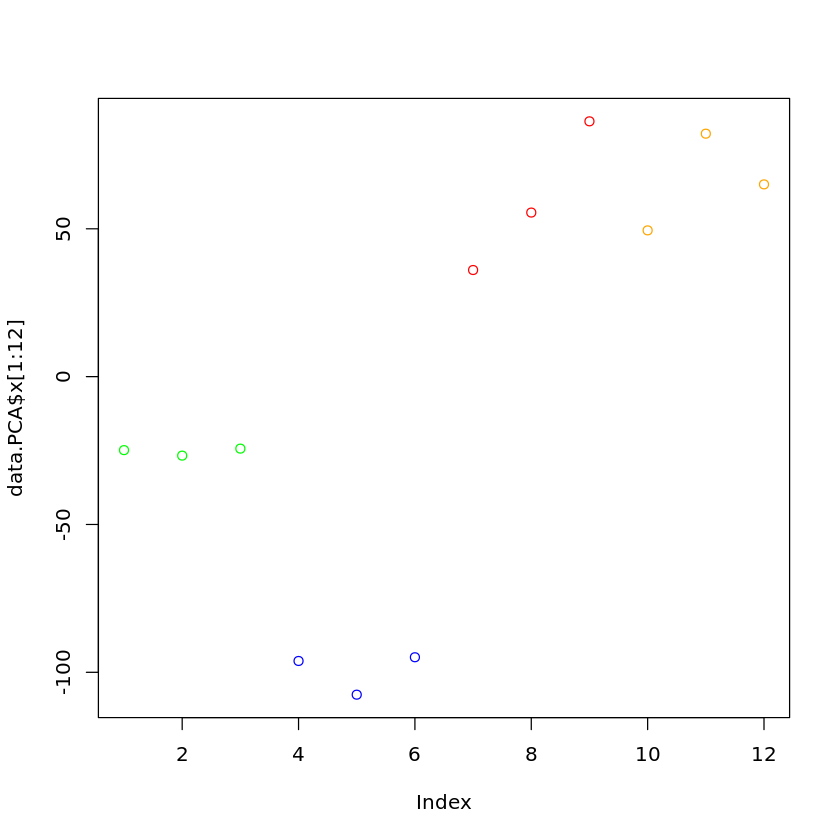

In [22]:
# PCA plot

color=c('green','green','green','blue','blue','blue', 'red','red','red', 'orange', 'orange', 'orange' )
data.PCA = prcomp(t(normexpr.gcrma),scale.=FALSE)
plot(data.PCA$x[1:12],col=color)


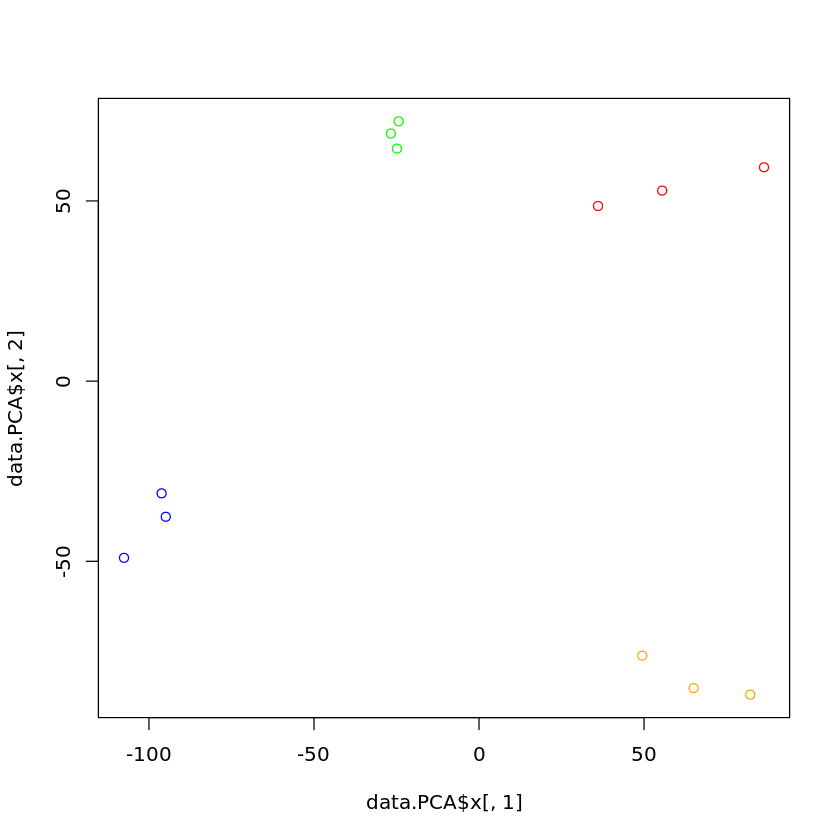

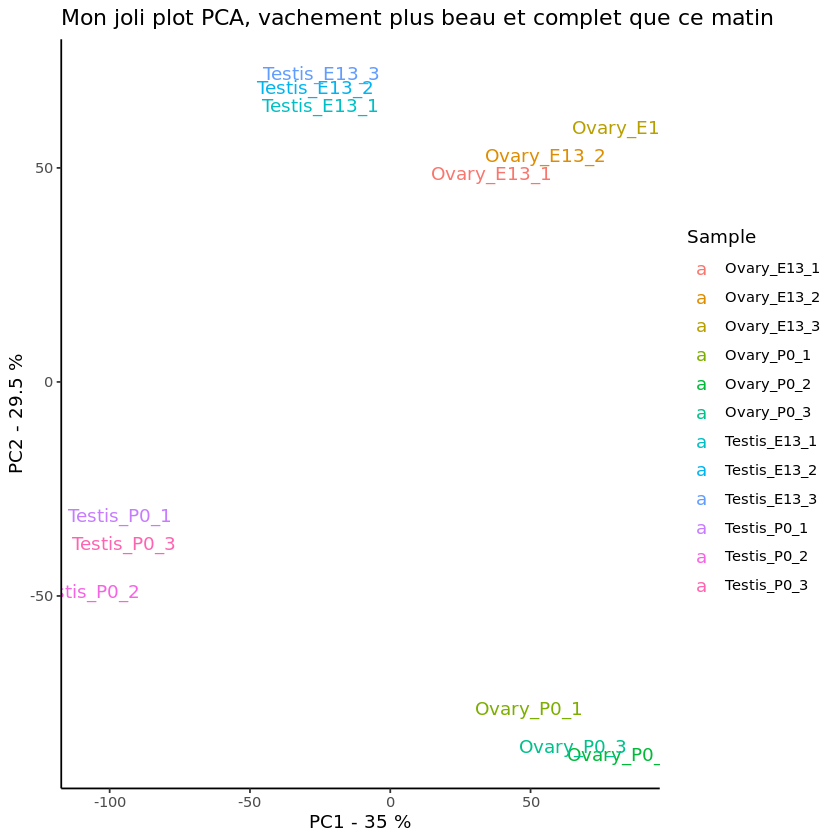

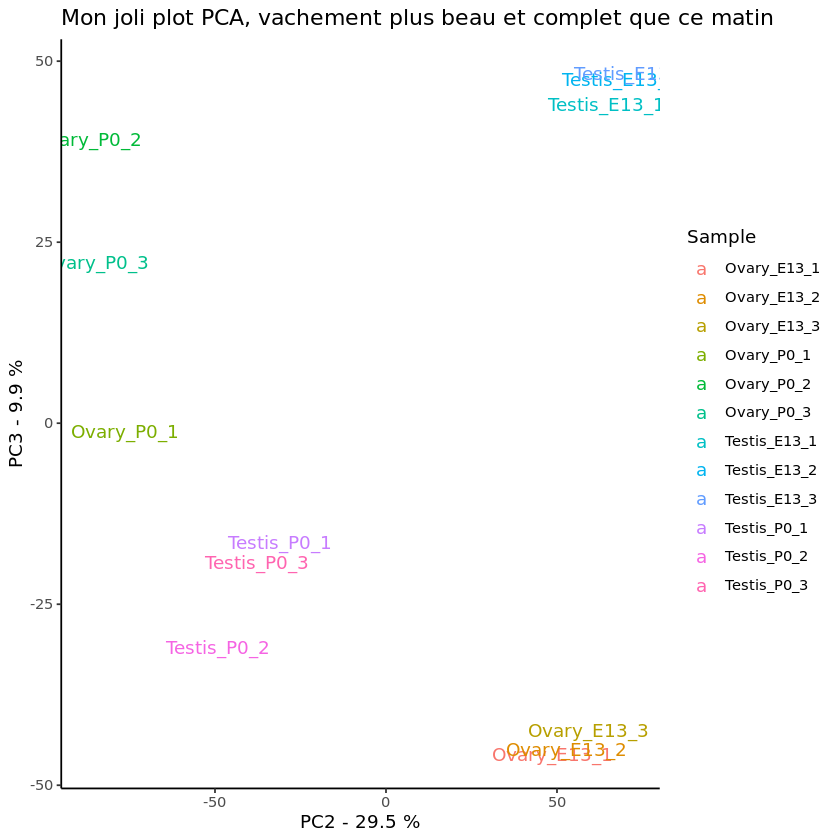

In [37]:
# To create a PCA plot you can use the prcomp() method. 
# Input is the matrix containing the normalized expression levels obtained by applying the exprs() method on data.gcrma. 

# (explications là ! : https://www.youtube.com/watch?v=0Jp4gsfOLMs)

color=c('green','green','green','blue','blue','blue', 'red','red','red', 'orange', 'orange', 'orange' )
data.PCA = prcomp(t(normexpr.gcrma),scale.=FALSE)

# plot des 2 premiers axes de la PCA
plot(data.PCA$x[,1], data.PCA$x[,2], col=color)

# la part de la variation expliquée par chaque axe est le carré de sdev (standard deviation),
# un des éléments fournis par la fonction prcomp()
pca.var = data.PCA$sdev^2
# et on l'exprime en % du total :
pca.var.per = round(pca.var/sum(pca.var)*100, 1)


# On peut également afficher la PCA avec ggplot2, qui permet de générer un plot avec encore plus d'infos:
# formatage des données comme ggplot2 les aime : une dataframe avec les coordonnées de chaque échantillons
pca.datagg = data.frame(Sample = ph@data[ ,1],
                        X = data.PCA$x[,1],
                        Y = data.PCA$x[,2])


# PCA plot avec ggplot2 (notez le titre informatif :-P)
ggplot(data = pca.datagg, aes (x=X, y=Y, label = Sample, colour = Sample)) +
  geom_text() +
  xlab(paste ("PC1 - ", pca.var.per[1], " %", sep = "")) +
  ylab(paste ("PC2 - ", pca.var.per[2], " %", sep = "")) +
  theme_classic() +
  ggtitle("Mon joli plot PCA, vachement plus beau et complet que ce matin")

# Vouspouvez maintenant voir que le premier axe montre la part de la variation entre transcriptomes : 35%, 
# qui visiblement est dûe au sexe gonadique (Testis à gauche et Ovary à droite). 
# Le second axe montre que près de 30 % de la variation est dûe au stade de développement : P0 en bas, E 13.5 en haut.



> <mark>**Question 8 :**<mark>  
>Que pensez-vous de la répartition des réplicats ?


### 5 - Identification des gènes DE (Différentiellement Exprimés)

Nous allons maintenant identifier les gènes dont l'expression varie entre les conditions.   
Nous allons d'abord effectuer une comparaison simple entre 2 groupes, ici le sexe gonadique.  
Nous attribuons à chaque échantillon sa valeur selon ce critère ("Testis" ou "Ovary"), puis nous indiquons à R que c'est cet élément qui va nous servir de facteur de comparaison.  
Puis une matrice de contraste est créée pour comparer les 2 groupes.


In [23]:
# Comparaison simple entre 2 groupes

# Ajout d'une colonne pour caractériser les échantillons
ph@data[ ,2] = c("Testis","Testis","Testis","Testis","Testis","Testis", "Ovary", "Ovary", "Ovary", "Ovary", "Ovary", "Ovary")
colnames(ph@data)[2]="SexGonad"

# On vérifie que le facteur a été correctement attribué
ph@data

# On forme les 2 groupes
groups = ph@data$SexGonad

f = factor(groups,levels=c("Testis","Ovary"))

design = model.matrix(~0 + f)
colnames(design) = c("Testis","Ovary")

data.fit = lmFit(data.gcrma,design)

# montre les 10 premières valeurs dans les 2 groupes
data.fit$coefficients[1:10,]

contrast.matrix = makeContrasts(Ovary-Testis,levels=design)
data.fit.con = contrasts.fit(data.fit,contrast.matrix)
data.fit.eb = eBayes(data.fit.con)


,sample,SexGonad
GSM323828-testis_E13_1.CEL.gz,Testis_E13_1,Testis
GSM323829-testis_E13_2.CEL.gz,Testis_E13_2,Testis
GSM323830-testis_E13_3.CEL.gz,Testis_E13_3,Testis
GSM323831-testis_P0_1.CEL.gz,Testis_P0_1,Testis
GSM323832-testis_P0_2.CEL.gz,Testis_P0_2,Testis
GSM323833-testis_P0_3.CEL.gz,Testis_P0_3,Testis
GSM323834-ovary_E13_1.CEL.gz,Ovary_E13_1,Ovary
GSM323835-ovary_E13_2.CEL.gz,Ovary_E13_2,Ovary
GSM323836-ovary_E13_3.CEL.gz,Ovary_E13_3,Ovary
GSM323849-ovary_P0_1.CEL.gz,Ovary_P0_1,Ovary


,Testis,Ovary
1415670_at,11.453671,11.308466
1415671_at,9.422570,9.860467
1415672_at,10.707639,11.053126
1415673_at,6.773503,6.485970
1415674_a_at,7.139610,7.741821
1415675_at,7.559237,7.998951
1415676_a_at,9.738490,9.909289
1415677_at,8.327882,8.777961
1415678_at,10.684268,10.023255
1415679_at,9.135180,10.014361


On affiche ensuite les résultats pour les 10 gènes les plus significativement différents :

In [24]:
# indique le noms des colonnes dans la matrice de résultats
names(data.fit.eb)

# montre les p-values associées au test pour les 10 premiers gènes
data.fit.eb$p.value[1:10,]

[1] "coefficients"     "rank"             "assign"           "qr"              
 [5] "df.residual"      "sigma"            "cov.coefficients" "stdev.unscaled"  
 [9] "Amean"            "method"           "design"           "contrasts"       
[13] "df.prior"         "s2.prior"         "var.prior"        "proportion"      
[17] "s2.post"          "t"                "df.total"         "p.value"         
[21] "lods"             "F"                "F.p.value"

1415670_at   1415671_at   1415672_at   1415673_at 1415674_a_at   1415675_at 
 0.066920531  0.012848215  0.062148417  0.148068383  0.053473535  0.039449102 
1415676_a_at   1415677_at   1415678_at   1415679_at 
 0.605387999  0.071934022  0.126693211  0.006202243

On peut visualiser les p-values obtenues avec un **Volcano Plot**  
(se crée aussi dans un fichier séparé, colonne de gauche)

In [25]:

# Volcano plot
name = "Volcano1.jpg"
jpeg(name)
volcanoplot(data.fit.eb,coef=1,highlight=50, style = "p-value", xlab = "log2 Fold Change", ylab = "-log10 p", names = NULL, hl.col = "blue")
dev.off()


png 
  2

><mark>**Question 9 :**<mark>  
>    Pensez-vous que les p-values soient interprétables directement ? Quelle étape importante doit d'abord être effectuée ?

### Correction des p-values pour les tests multiples
The topTable() method returns a table ranking the genes according to evidence for differential expression.  
Additionally, the topTable() method will adjust the p-value obtained from the moderated t-test for multiple testing. 
The adjustment method is defined by the adjust.method argument. In this case, the adjustment is done using BH which is Benjamini and Hochberg's method to control the FDR.


In [26]:
options(digits=2)
tab = topTable(data.fit.eb,coef=1,number=5000,adjust.method="BH")

tab[1:10,]

# la colonne B indique le log odds scores, 
# c'est à dire le logarithme de la vraisemblance de la DE par rapport à l'hypothèse nulle
# (ratio des vraisemblances, transformée en log).
# Souvenez-vous des cours et TP sur la méthode des lod-scores en génétique humaine de L3 !)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
1417210_at,-7.8,6.1,-97,9.3e-17,4.2e-12,19
1452562_at,-7.2,5.8,-62,1.0e-14,2.3e-10,18
1423287_at,-6.7,6.6,-46,2.3e-13,3.4e-09,17
1434959_at,-8.1,6.7,-40,9.4e-13,1.1e-08,17
1449285_at,-7.0,7.1,-32,1.1e-11,9.7e-08,16
1436936_s_at,9.6,7.5,31,1.4e-11,1.0e-07,15
1452563_a_at,-4.2,4.6,-30,1.6e-11,1.0e-07,15
1431642_at,-5.4,4.9,-30,1.8e-11,1.0e-07,15
1427262_at,8.0,6.4,29,3.0e-11,1.5e-07,15
1422638_s_at,-3.9,4.7,-28,4.4e-11,2.0e-07,15


On peut se servir de la même fonction topTable() pour sélectionner les gènes selon des seuils, par exemple de p-value

In [27]:
# Sélection des gènes selon la adjusted p-value, sous un certain seuil

topgenesAdjP = tab[tab[, "adj.P.Val"] < 0.001, ]

# nombre de gènes correpsondant au critère :
dim(topgenesAdjP)[1]

topgenesAdjP[1:10,]



[1] 144

,logFC,AveExpr,t,P.Value,adj.P.Val,B
1417210_at,-7.8,6.1,-97,9.3e-17,4.2e-12,19
1452562_at,-7.2,5.8,-62,1.0e-14,2.3e-10,18
1423287_at,-6.7,6.6,-46,2.3e-13,3.4e-09,17
1434959_at,-8.1,6.7,-40,9.4e-13,1.1e-08,17
1449285_at,-7.0,7.1,-32,1.1e-11,9.7e-08,16
1436936_s_at,9.6,7.5,31,1.4e-11,1.0e-07,15
1452563_a_at,-4.2,4.6,-30,1.6e-11,1.0e-07,15
1431642_at,-5.4,4.9,-30,1.8e-11,1.0e-07,15
1427262_at,8.0,6.4,29,3.0e-11,1.5e-07,15
1422638_s_at,-3.9,4.7,-28,4.4e-11,2.0e-07,15


><mark>**Question 9 :**<mark>  
>    Indiquez le nombre de gènes qui sont en dessous des seuils de p-value suivants :  
>     adj p < 0.05  
>     adj p < 0.01  
>     adj p < 0.001  

In [28]:
# pour séparer les gènes up- and down-regulated, on inclut un seuil sur le log fold change :
  
topUpAdjP = topgenesAdjP[topgenesAdjP[, "logFC"] > 1, ]
dim(topUpAdjP)[1]
topDownAdjP = topgenesAdjP[topgenesAdjP[, "logFC"] < -1, ]
dim(topDownAdjP)[1]


[1] 55

[1] 85

><mark>**Question 10 :**<mark>  
>    Pour chacun des seuilsde p-value précédents, indiquez le nombre de gènes up et down-régulés

><mark>**Question 11 :**<mark>  
>    Est-ce que l'identification de ces gènes DE nous permet de capturer la totalité des variations des transcriptomes dans ces échantillons ?  
> Quel autre facteur n'a pas été pris en compte ?  
> Pensez-vous qu'une analyse entre 2 groupes en factorisant par ce 2ème facteur suffise ?

### Analyse ANOVA
En fait nous avons réellement 4 groupes, et il vaut mieux utiliser un test statistique plus fin pour bien voir les différences entre ces 4 groupes.
Une ANOVA à 2 facteurs est le bon choix ici. Cette méthode permet de tester l'effet de chaque facteur ainsi que de leur éventuelle interaction.  
Nous commençons par redéfinir des groupes, mais ce coup-ci, en établissant 2 facteurs   
 - fs : facteur Sexe Gonadique
 - fd : facteur de stades de développement  
Chacun des 2 facteurs possèdent 2 niveaux (on pourrait donc en spécifier plus si nécessaire, par exemple pour les stades de développement).  
On effectue ensuite l'analyse en disant que l'on veut l'effet des 2 facteurs et leur interaction (sigen * dans la fonction model.matrix().  



In [29]:
ph@data[ ,3] = c("Testis","Testis","Testis","Testis","Testis","Testis", "Ovary", "Ovary", "Ovary", "Ovary", "Ovary", "Ovary")
colnames(ph@data)[3]="GonadSex"
ph@data[ ,4] = c("E13","E13","E13","P0","P0","P0", "E13", "E13", "E13", "P0", "P0", "P0")
colnames(ph@data)[4]="DevStage"
ph@data

groupsS = ph@data$GonadSex 
groupsD = ph@data$DevStage
fs = factor(groupsS,levels=c("Testis","Ovary"))
fd = factor(groupsD,levels=c("E13","P0"))

factored.design = model.matrix(~fs*fd)
data.fit4 = lmFit(data.gcrma,factored.design)

# Affichage des résultats :
# data.fit4[1:10,]
# Lmfit() will fit a linear model to the data. It will create a data frame called data.fit4 containing 4 columns:
#   the first column contains the intercept of the linear model: it's the mean log expression in the testis samples
#   the second column compares Ovary samples with Testis
#   the third column compares P0 with E13
#   the fourth column contains the interaction showing you if the genes that respond to the gonadal sex are influenced by the developmental stage

# Performing the two-factor ANOVA is now done using eBayes(). 
data.fit.eb4 = eBayes(data.fit4)

# Affichage des p-value pour chacun des facteurs et leur interactions, pour les 15 premiers gènes
data.fit.eb4$p.value[1:15,1:4]


,sample,SexGonad,GonadSex,DevStage
GSM323828-testis_E13_1.CEL.gz,Testis_E13_1,Testis,Testis,E13
GSM323829-testis_E13_2.CEL.gz,Testis_E13_2,Testis,Testis,E13
GSM323830-testis_E13_3.CEL.gz,Testis_E13_3,Testis,Testis,E13
GSM323831-testis_P0_1.CEL.gz,Testis_P0_1,Testis,Testis,P0
GSM323832-testis_P0_2.CEL.gz,Testis_P0_2,Testis,Testis,P0
GSM323833-testis_P0_3.CEL.gz,Testis_P0_3,Testis,Testis,P0
GSM323834-ovary_E13_1.CEL.gz,Ovary_E13_1,Ovary,Ovary,E13
GSM323835-ovary_E13_2.CEL.gz,Ovary_E13_2,Ovary,Ovary,E13
GSM323836-ovary_E13_3.CEL.gz,Ovary_E13_3,Ovary,Ovary,E13
GSM323849-ovary_P0_1.CEL.gz,Ovary_P0_1,Ovary,Ovary,P0


,(Intercept),fsOvary,fdP0,fsOvary:fdP0
1415670_at,4.8e-16,0.1816,0.33245,0.9982
1415671_at,8.3e-14,0.4822,0.24617,0.0153
1415672_at,3.2e-13,0.8343,0.06613,0.0695
1415673_at,4.6e-12,0.2826,0.01050,0.0033
1415674_a_at,1.7e-09,0.1948,0.25154,0.8289
1415675_at,2.2e-12,0.9685,0.01025,0.0102
1415676_a_at,2.7e-13,0.1545,0.00010,0.0077
1415677_at,1.1e-10,0.4327,0.22244,0.4374
1415678_at,5.5e-13,0.0027,0.00097,0.2145
1415679_at,3.3e-12,0.3749,0.00848,0.0039


La correction des tests multiples s'effectue ici avec une autre fonction : decideTests()  
On peut là aussi spécifier des seuils pour ne garder que les gènes à considérer comme DE.  
La fonction retourne alors des valeurs 0, 1, -1 selon que le gène remplit les critères de sélection.

In [30]:
# Correction des tests multiples avec une comparaison multiple (i.e une 2-way ANOVA)
# The decideTests() method will perform multiple testing adjustment on these p-values. 
# Additionally, it will evaluate for each gene whether the results data.fit.eb fulfill the criteria for differential expression that you specify.
# For each gene and each comparison it will generate the following output:
#   -1: significantly downregulated
#    0: no significant evidence of differential expression
#    1: significantly upregulated
# The p.value argument specifies the FDR and the lfc argument specifies the minimal fold change that is required to be considered DE.

DEresults = decideTests(data.fit.eb4,method='global',adjust.method="BH",p.value=0.05,lfc=1)
DEresults[1:10,]

DEresultsStrict = decideTests(data.fit.eb4,method='global',adjust.method="BH",p.value=0.01,lfc=2)
DEresultsStrict[1:10,]

,(Intercept),fsOvary,fdP0,fsOvary:fdP0
1415670_at,1,0,0,0
1415671_at,1,0,0,0
1415672_at,1,0,0,0
1415673_at,1,0,0,0
1415674_a_at,1,0,0,0
1415675_at,1,0,0,0
1415676_a_at,1,0,-1,0
1415677_at,1,0,0,0
1415678_at,1,0,1,0
1415679_at,1,0,0,1


,(Intercept),fsOvary,fdP0,fsOvary:fdP0
1415670_at,1,0,0,0
1415671_at,1,0,0,0
1415672_at,1,0,0,0
1415673_at,1,0,0,0
1415674_a_at,1,0,0,0
1415675_at,1,0,0,0
1415676_a_at,1,0,0,0
1415677_at,1,0,0,0
1415678_at,1,0,0,0
1415679_at,1,0,0,0


### Diagramme de Venn

Pour terminer, on peut afficher des diagrammes de Venn qui montrent comment se répartissent les gènes DE selon les facteurs considérés.

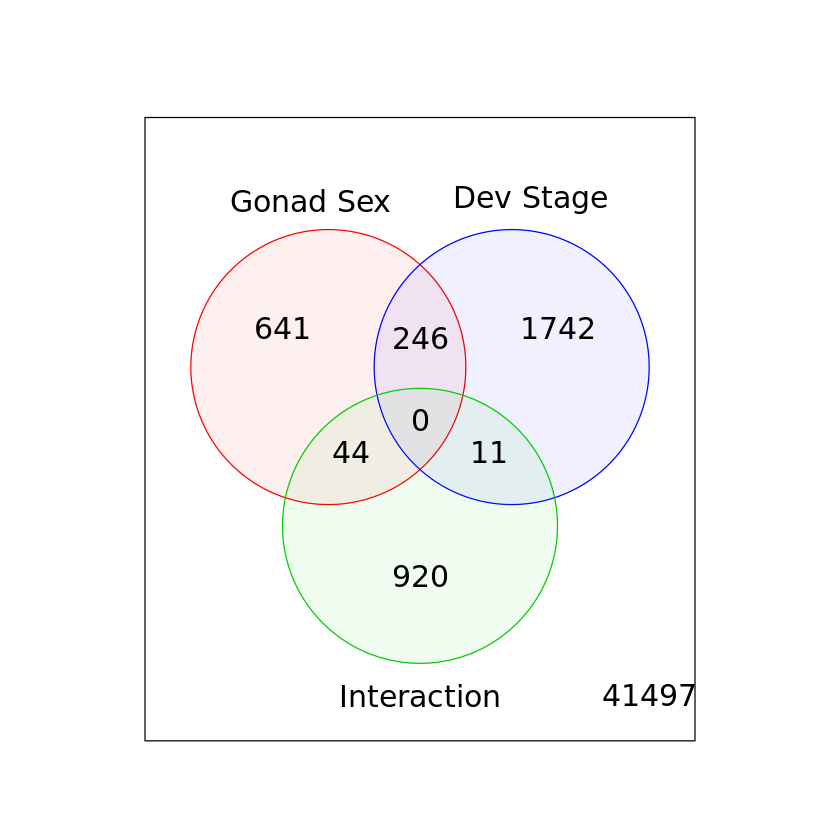

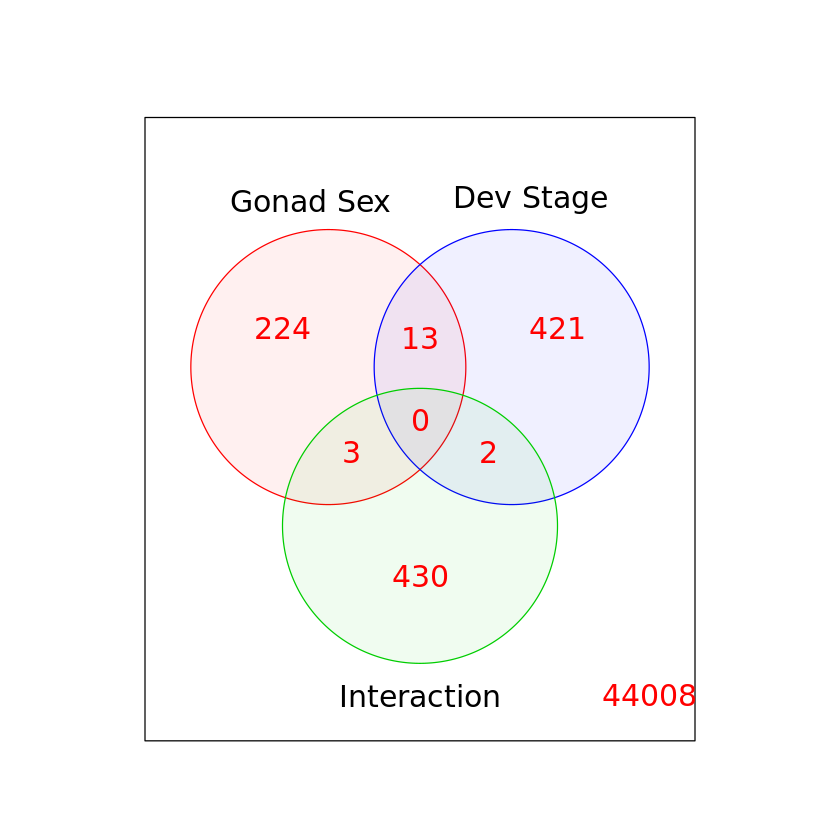

In [31]:
# Diagramme de Venn des gènes DE
# "both" for all differentially expressed genes, "up" for up-regulated genes only or "down" for down-regulated genes only.

vennDiagram(DEresults[,2:4], include="down", names= c("Gonad Sex", "Dev Stage", "Interaction"), counts.col=c("black"), circle.col = c("red", "blue", "green3"))
vennDiagram(DEresultsStrict[,2:4], include="up", names= c("Gonad Sex", "Dev Stage", "Interaction"), counts.col="red", circle.col = c("red", "blue", "green3"))



><mark>**Question 12 :**<mark>   
> <mark>   Reprenez et modifiez le code dess cellules précedentes de façon à produire un diagramme de Venn :  <mark>  
> <mark>  - sur les gènes avec une adj pvalue < 0.01  <mark>  
> <mark>  - et avec un log fold change supérieur à 1.5      <mark>                                     
> <mark>  - les gènes up et down-régulés   <mark>  
> <mark>  - avec l'écriture des comptages en rouge  <mark> 
  

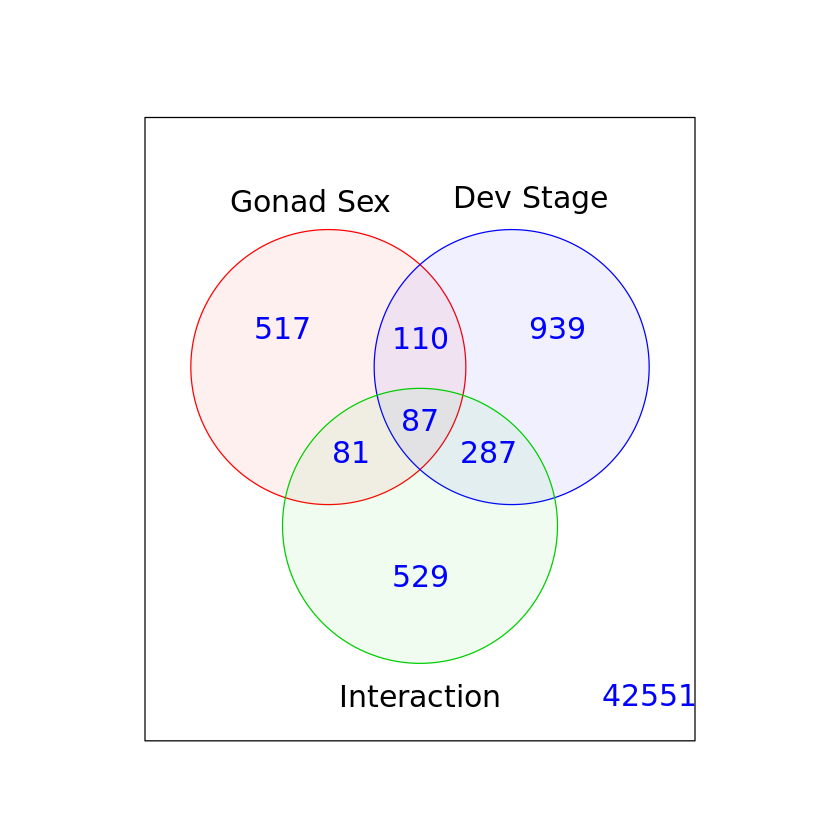

In [32]:
# rentrez ici le code modifié pour répondre à la question 12

DEresultsStrict2 = decideTests(data.fit.eb4,method='global',adjust.method="BH",p.value=0.01,lfc=1.5)
vennDiagram(DEresultsStrict2[,2:4], include="both", names= c("Gonad Sex", "Dev Stage", "Interaction"), counts.col="blue", circle.col = c("red", "blue", "green3"))



><mark>**Question 13 :**<mark>   
> Combien de gènes sont DE à la fois selon le sexe et le stade de développement ?  
> Combien de gènes ont leur expression modifiée selon le stade de développemnt, mais pas différemment selon le sexe ?